In [1]:
import sddk
import re
import requests
import pandas as pd
import geopandas as gpd
pd.set_option('display.max_columns', 200)
import matplotlib.pyplot as plt

In [16]:
s = sddk.cloudSession("sciencedata.dk", "SDAM_root", "648597@au.dk")

connection with shared folder established with you as its owner
endpoint variable has been configured to: https://sciencedata.dk/files/SDAM_root/


# Import EDH dataset with "origo_clean" column

In [13]:
# use your own dataset
LIST = gpd.read_parquet("../../LIRE_ETL/data/large_data/LIST_v0-3.parquet")

In [14]:
LIST.columns

Index(['LIST-ID', 'EDCS-ID', 'EDH-ID', 'trismegistos_uri', 'pleiades_id',
       'transcription', 'inscription', 'clean_text_conservative',
       'clean_text_interpretive_sentence', 'clean_text_interpretive_word',
       'clean_text_interpretive_word_EDCS', 'diplomatic_text', 'province',
       'place', 'inscr_type', 'status_notation', 'inscr_process', 'status',
       'partner_link', 'last_update', 'letter_size', 'type_of_inscription',
       'work_status', 'year_of_find', 'present_location', 'text_edition',
       'support_objecttype', 'support_material', 'support_decoration',
       'keywords_term', 'people', 'type_of_inscription_clean',
       'type_of_inscription_certainty', 'height_cm', 'width_cm', 'depth_cm',
       'material_clean', 'type_of_monument_clean',
       'type_of_monument_certainty', 'province_label_clean',
       'province_label_certainty', 'country_clean', 'country_certainty',
       'findspot_ancient_clean', 'findspot_ancient_certainty',
       'modern_region_cle

In [19]:
# this does not work, since the JSON is unproperly formatted - as a list with one string element - the string encapsulates all content

#EDH = s.read_file("https://sciencedata.dk/files/SDAM_root/SDAM_data/EDH/public/EDH_people_clean_origo_2021-08-11.json", "df")
EDH = sddk.read_file("https://sciencedata.dk/public/b6b6afdb969d378b70929e86e58ad975/EDH_people_clean_origo_2021-08-11.json")

In [3]:
resp_json = requests.get("https://sciencedata.dk/public/b6b6afdb969d378b70929e86e58ad975/EDH_people_clean_origo_2021-08-11.json").json()
resp_json_eval = eval(resp_json[0])
edh_people_origo = pd.DataFrame(resp_json_eval)
edh_people_origo.head(5)

,responsible_individual,type_of_inscription,letter_size,not_after,literature,work_status,height,diplomatic_text,name,cognomen,nomen,person_id,gender,people,depth,material,type_of_monument,province_label,width,transcription,country,uri,findspot_ancient,last_update,modern_region,findspot_modern,language,id,edh_geography_uri,commentary,trismegistos_uri,not_before,external_image_uris,fotos,longitude,latitude,idno_tm,placenames_refs,text_edition,origdate_text,layout_execution,layout_execution_text,support_objecttype,support_objecttype_text,support_material,support_material_text,support_decoration,keywords_term,keywords_term_text,type_of_inscription_clean,type_of_inscription_certainty,height_cm,width_cm,depth_cm,material_clean,type_of_monument_clean,type_of_monument_certainty,province_label_clean,province_label_certainty,country_clean,country_certainty,findspot_ancient_clean,findspot_ancient_certainty,modern_region_clean,modern_region_certainty,findspot_modern_clean,findspot_modern_certainty,findspot_clean,findspot_certainty,origdate_text_clean,clean_text_conservative,clean_text_interpretive_word,clean_text_interpretive_sentence,praenomen,age: years,findspot,year_of_find,tribus,status,present_location,religion,occupation,origo,geography,origo_clean,age: days,social_economic_legal_history,military,age: months,supernomen,age: hours
0,Feraudi,epitaph,3.2-2 cm,0130,"AE 1983, 0192.; M. Annecchino, Puteoli 4/5, 19...",provisional,33 cm,D M / NONIAE P F OPTATAE / ET C IVLIO ARTEMONI...,Noniae P.f. Optatae,Optata,Nonia,1,female,{},2.7 cm,"Marmor, geädert / farbig",tabula,Latium et Campania (Regio I),34 cm,D(is) M(anibus) / Noniae P(ubli) f(iliae) Opta...,Italy,https://edh-www.adw.uni-heidelberg.de/edh/insc...,"Cumae, bei",2014-04-07,Campania,"Cuma, bei",Latin,HD000001,https://edh-www.adw.uni-heidelberg.de/edh/geog...,(C): 2. Hälfte 1. - Anfang 2. Jh. - AE; Ende ...,https://www.trismegistos.org/text/251193,0071,{},{},14.0551,40.8472,251193,"[http://www.trismegistos.org/place/033152, htt...",Dis Manibus Noniae Publi filiae Optatae et Cai...,71 AD – 130 AD,21,unbestimmt,257,Tafel,,"Marmor, geädert / farbig",1000,92,Grabinschrift,epitaph,Certain,33.0,34.0,2.7,Marble,tabula,Certain,Latium et Campania (Regio I),Certain,Italy,Certain,Cumae,Estimated,Campania,Certain,"Cuma, bei",Certain,NULL,NULL,71 AD – 130 AD,D M Noniae P f Optatae et C Iulio Artemoni par...,Dis Manibus Noniae Publi filiae Optatae et Cai...,Dis Manibus Noniae Publi filiae Optatae et Cai...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Feraudi,epitaph,3.2-2 cm,0130,"AE 1983, 0192.; M. Annecchino, Puteoli 4/5, 19...",provisional,33 cm,D M / NONIAE P F OPTATAE / ET C IVLIO ARTEMONI...,C. Iulio Artemoni,Artemo,Iulius,2,male,{},2.7 cm,"Marmor, geädert / farbig",tabula,Latium et Campania (Regio I),34 cm,D(is) M(anibus) / Noniae P(ubli) f(iliae) Opta...,Italy,https://edh-www.adw.uni-heidelberg.de/edh/insc...,"Cumae, bei",2014-04-07,Campania,"Cuma, bei",Latin,HD000001,https://edh-www.adw.uni-heidelberg.de/edh/geog...,(C): 2. Hälfte 1. - Anfang 2. Jh. - AE; Ende ...,https://www.trismegistos.org/text/251193,0071,{},{},14.0551,40.8472,251193,"[http://www.trismegistos.org/place/033152, htt...",Dis Manibus Noniae Publi filiae Optatae et Cai...,71 AD – 130 AD,21,unbestimmt,257,Tafel,,"Marmor, geädert / farbig",1000,92,Grabinschrift,epitaph,Certain,33.0,34.0,2.7,Marble,tabula,Certain,Latium et Campania (Regio I),Certain,Italy,Certain,Cumae,Estimated,Campania,Certain,"Cuma, bei",Certain,NULL,NULL,71 AD – 130 AD,D M Noniae P f Optatae et C Iulio Artemoni par...,Dis Manibus Noniae Publi filiae Optatae et Cai...,Dis Manibus Noniae Publi filiae Optatae et Cai...,C.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Feraudi,epitaph,3.2-2 cm,0130,"AE 1983, 0192.; M. Annecchino, Puteoli 4/5, 19...",provisional,33 cm,D M / NONIAE P F OPTATAE / ET C IVLIO ARTEMONI...,C. Iulius C.f. Optatus,Optatus,Iulius,3,male,{},2.7 cm,"Marmor, geädert / farbig",tabula,Lat

In [4]:
origo_origo_clean_dict = dict(zip(edh_people_origo["origo"], edh_people_origo["origo_clean"])) # use our origo clean values

In [5]:
edh_data_pers = pd.read_csv("../data/edh_data_pers.csv", low_memory=False) # read data directly donwloaded from EDH website

In [6]:
edh_data_pers[edh_data_pers["hd_nr"]=="HD025474"]

,id,hd_nr,name,praenomen,nomen,cognomen,supernomen,filiation,tribus,origo,besonderheit,geschlecht,verwandt,status,funktion,beruf,l_jahre,l_monate,l_tage,l_stunden,pers_no,uri,pir
25316,HD025474/1,HD025474,Γαιω Κουρτιω Ιουστω,Γ.,Κούρτιος,Ἰοῦστος,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
25317,HD025474/2,HD025474,Ιουλιω Ναυτωνε,NaN,Ἰούλιος,Ναυτών,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
25318,HD025474/3,HD025474,Αισχινης Αισχινου / Aesc(h)ine(!) Aesc(h)ine(!),NaN,NaN,Αἰσχίνης,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
25319,HD025474/4,HD025474,Αισχινου / Aesc(h)ine(!),NaN,NaN,Αἰσχίνης,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN
25320,HD025474/5,HD025474,Φλαουιανος Μιλησιος / Flavianum(!),NaN,NaN,Φλαουιανός / Flavianus,NaN,NaN,NaN,Μιλήσιος,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN
25321,HD025474/6,HD025474,Τιτω Μεμμιω Μοντανω,Τ.,Μέμμιος,Μοντανός,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN
25322,HD025474/7,HD025474,Μαρμαριαι / Marmariae,NaN,NaN,Μαρμαρία / Marmaria,NaN,NaN,NaN,NaN,NaN,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN
25323,HD025474/8,HD025474,Domitius The/ophilus,NaN,Domitius,Theophilus,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN


In [7]:
edh_data_pers["l_jahre"].notnull().sum()

8808

In [8]:
((edh_data_pers["origo"].notnull()) & (edh_data_pers["l_jahre"].notnull())).sum()

970

In [9]:
def get_origo_clean(origo_raw):
    try:
        return origo_origo_clean_dict[origo_raw]
    except:
        return origo_raw
edh_data_pers["origo_clean"] = edh_data_pers["origo"].apply(get_origo_clean)

In [10]:
len(edh_data_pers)

93646

In [11]:
edh_data_pers["origo"].notnull().sum()

2672

In [12]:
origo_df = edh_data_pers[edh_data_pers["origo"].notnull()][["id", "hd_nr","origo", "origo_clean"]]
origo_df.head(5)

,id,hd_nr,origo,origo_clean
18,HD000011/1,HD000011,Batavus+,Batavus
50,HD000030/1,HD000030,Italicensis*,Italicensis
53,HD000033/1,HD000033,Laudicenus (= Laodicenus) ex Asia,Laodicenus Asia
60,HD000035/1,HD000035,Iponobensis,Iponobensis
66,HD000040/2,HD000040,Pannonius*,Pannonius


In [24]:
def get_val_by_id(id, mydict):
    try:
        return mydict[id]
    except:
        return None

for tup in [("findspot_clean", "EDH_findspot"), ("province_label_clean", "EDH_province"),  ("modern_region_clean", "EDH_modern_region"),("clean_text_interpretive_word", "EDH_inscription_text"),  ("geometry", "EDH_geometry")]:
    edh_val_dict = dict(zip(LIST["EDH-ID"], LIST[tup[0]]))
    origo_df[tup[1]] = origo_df["hd_nr"].apply(lambda x: get_val_by_id(x, edh_val_dict))

In [25]:
origo_df

,id,hd_nr,origo,origo_clean,EDH_findspot,EDH_province,EDH_modern_region,EDH_inscription_text,EDH_geometry
18,HD000011/1,HD000011,Batavus+,Batavus,"Magliana, Tiber",Latium et Campania (Regio I),Lazio,Vetus Neronis Claudi Caesaris Augusti corporis...,POINT (12.4862 41.8917)
50,HD000030/1,HD000030,Italicensis*,Italicensis,"Porticus, sekundär verwendet",Baetica,NULL,Apollini Augusto sacrum Marcus Sentius Marci f...,POINT (-6.0411 37.4355)
53,HD000033/1,HD000033,Laudicenus (= Laodicenus) ex Asia,Laodicenus Asia,"Via Appia, Tennisclub 'Oasi di Pace'",Roma,Lazio,Dis Manibus Luci Sedati Celsi Artemae Laudicen...,POINT (12.4862 41.8917)
60,HD000035/1,HD000035,Iponobensis,Iponobensis,NULL,Baetica,Córdoba,Publius Rocius Cleanthus Iponobensis,None
66,HD000040/2,HD000040,Pannonius*,Pannonius,NULL,Roma,Roma,Aelius Florus miles cohortis V praetoriae cent...,POINT (12.4862 41.8917)
...,...,...,...,...,...,...,...,...,...
93499,HD082681/1,HD082681,Antiochensis*,Antiochensis*,Rhein,Germania inferior,Nordrhein-Westfalen,Heliades Adrasti Antiochensis annorum LV stipe...,None
93512,HD082689/1,HD082689,Agrippinensi*,Agrippinensi,NULL,Germania inferior,Nordrhein-Westfalen,Dis Manibus Iuliae Pieridi Agrippinensi heres ...,None
93540,HD082721/1,HD082721,domo Volsiniis*,domo Volsiniis*,NULL,Thracia,Plovdiv,Dis Manibus Gaius Volcius Gai filius Ouffentin...,POINT (24.751 42.1468)
93555,HD082732/3,HD082732,Pautalia,Pautalia,"Lager, {principia}",Moesia inferior,Veliko Târnovo,Iovi Optimo Maximo pro salute domini nostri Im...,POINT (25.3944 43.6125)


# Import Pleiades

In [26]:
# (we also did some experiments with Hanson's cities
# but it's discontinued)

# roman_cities = sddk.read_file("https://sciencedata.dk/public/cd2e3b7206a89bf833cf3648703452e9/roman_cities.json", "df")
# roman_cities.head(5)

# cities_names = roman_cities["Ancient Toponym"].tolist()
# len([place for place in origo_unique if place in cities_names])

In [27]:
# import pleiades places
# we chose places, instead of locations or names, since it contains the featureTypes column as well

#url = "http://atlantides.org/downloads/pleiades/json/pleiades-places-20210822.json.gz"
url = "http://atlantides.org/downloads/pleiades/dumps/pleiades-places-latest.csv.gz"
# or: "http://atlantides.org/downloads/pleiades/dumps/pleiades-places-20220615.csv.gz"
pleiades_places = pd.read_csv(url, compression='gzip')
pleiades_places.head(5)

,authors,bbox,connectsWith,created,creators,currentVersion,description,extent,featureTypes,geoContext,hasConnectionsWith,id,locationPrecision,maxDate,minDate,modified,path,reprLat,reprLatLong,reprLong,tags,timePeriods,timePeriodsKeys,timePeriodsRange,title,uid
0,"Becker, J., T. Elliott","13.4119837, 42.082885, 13.4119837, 42.082885",413005,2016-11-04T16:36:09Z,"jbecker, thomase",1.0,The post-Roman settlement at Alba Fucens becam...,"{""type"": ""Point"", ""coordinates"": [13.4119837, ...",settlement,NaN,NaN,48210385,precise,1453.0,640.0,2016-11-08T21:58:28Z,/places/48210385,42.082885,"42.082885,13.4119837",13.411984,NaN,M,mediaeval-byzantine,"640.0,1453.0",Borgo Medievale,ece5760c4c6d42c1a331aad543c4ecc4
1,"Becker, J., T. Elliott","11.6285463, 42.4193742, 11.6285463, 42.4193742",413393,2016-11-04T16:39:09Z,"jbecker, thomase",2.0,A major urban sanctuary at Vulci with a long p...,"{""type"": ""Point"", ""coordinates"": [11.6285463, ...",temple-2,NaN,NaN,48210386,precise,300.0,-750.0,2016-12-05T11:47:10Z,/places/48210386,42.419374,"42.4193742,11.6285463",11.628546,"sanctuary, extant remains, temple",ACHR,"archaic,classical,hellenistic-republican,roman","-750.0,300.0",Tempio Grande at Vulci,4e06898f2de74dbc9f3a3bdba6d74ba2
2,"Spann, P., DARMC, R. Talbert, S. Gillies, R. W...","-3.606772, 39.460299, -3.606772, 39.460299",NaN,2010-09-24T19:02:22Z,P.O. Spann,15.0,"An ancient settlement, likely of Celtic origin...","{""type"": ""Point"", ""coordinates"": [-3.606772, 3...",settlement,Consuegra,266518,265876,precise,640.0,-330.0,2020-09-25T03:36:50Z,/places/265876,39.460299,"39.460299,-3.606772",-3.606772,"dare:ancient=1, dare:major=1, dare:feature=maj...",HRL,"hellenistic-republican,roman,late-antique","-330.0,640.0",Consabura/Consabrum,3fb26862377912da0f866fc310bcaf0c
3,"Spann, P., R. Twele, R. Talbert, J. Becker, T....","-1.10341660496, 38.0622869617, -0.621575751277...",NaN,2010-09-24T19:02:24Z,P.O. Spann,4.0,Contestania was a region located in the southw...,"{""type"": ""Polygon"", ""coordinates"": [[[-1.10341...","region, label","SE coastal area, E Bastetania up to R. Júcar (...",266018,265877,precise,300.0,-330.0,2022-09-10T21:27:23Z,/places/265877,38.428230,"38.4282302524,-0.879814039831",-0.879814,NaN,HR,"hellenistic-republican,roman","-330.0,300.0",Contestania (region),ff0b70ad7c02ce378753e5d02f00210c
4,"Spann, P., DARMC, R. Talbert, R. Warner, J. Be...","-2.403309, 37.241792, -2.403309, 37.241792",NaN,2010-09-24T19:02:25Z,P.O. Spann,8.0,"An ancient place, cited: BAtlas 27 C4 Cueva de...","{""type"": ""Point"", ""coordinates"": [-2.403309, 3...",mine-2,"Cueva de la Paloma, 12 miles NE Gergal",NaN,265878,precise,300.0,-330.0,2021-01-15T16:23:31Z,/places/265878,37.241792,"37.241792,-2.403309",-2.403309,"dare:major=0, copper, dare:feature=mine, dare:...",HR,"hellenistic-republican,roman","-330.0,300.0",Cueva de la Paloma,5901bbdb1e0e9ae93968083c8b013026


In [28]:
len(pleiades_places) # in August 2021, there was 38494

39891

In [29]:
pleiades_places["featureTypes"].unique().tolist()[:10]

['settlement',
 'temple-2',
 'region, label',
 'mine-2',
 'island',
 'settlement, settlement-modern',
 'villa',
 'cape',
 'sanctuary',
 'settlement-modern']

In [30]:
pleiades_places["settl?"] = pleiades_places["featureTypes"].str.contains("settlement", na=False)

In [31]:
# what about "(" and ")" in titles?
[place for place in pleiades_places["title"] if "(" in place]

['Contestania (region)',
 'Ebusus (island)',
 'Edetania (region)',
 'Roman Villa at El Faro (Torrox)',
 'Ferrarium/Tenebrium (promontory)',
 '(I)Aspis',
 'Maenuba (river)',
 'Malaca (river)',
 'Marianus (mountain range)',
 'Orospeda (mountain)',
 'Pityussae (islands)',
 'Planesia (island)',
 'Saetabis (river)',
 'Saturni/Scombraria (promontory)',
 'Scombraria (island)',
 'Solorius (mountain)',
 'Sorobis (river)',
 '(S)Ucia',
 'Sucro (river)',
 'Tader (river)',
 'Tagonios (river)',
 'Turdetania (region)',
 'Turia (river)',
 'Udiva? (river)',
 'Vi(v)atia',
 'Puente Mocho (río Guadalimar)',
 'Ouarada/Varciliens(...)',
 'Pallantia (river)',
 'Salduba (river)',
 'Theodorus (river)',
 'Trete Iugum (promontory)',
 'Aquila Maior (promontory)',
 'Aquila Minor (promontory)',
 'Heras? (island)',
 'Heras? (island)',
 'Laud (river)',
 'Lixus (river)',
 'Mauretania Tingitana (region)',
 'Salat (river)',
 'Sububus (river)',
 'Tamuda (river)',
 'Zilia (river)',
 'Anides (river)',
 'Akra (island)',
 'C

In [32]:
# ok, we will need to get rid off these using some minimalist regex
re.sub(r'\(|\)', '', "(A)m(p)saga")

'Ampsaga'

In [33]:
# let's modify the title column into a list

def get_place_list(string_with_slashes):
    place_list = string_with_slashes.split("/")
    place_list = [re.sub(r'\(|\)', '', place.partition(" (")[0]).replace("?", "") for place in place_list]
    return place_list

pleiades_places["title_list"] = pleiades_places["title"].apply(get_place_list)

In [34]:
pleiades_places

,authors,bbox,connectsWith,created,creators,currentVersion,description,extent,featureTypes,geoContext,hasConnectionsWith,id,locationPrecision,maxDate,minDate,modified,path,reprLat,reprLatLong,reprLong,tags,timePeriods,timePeriodsKeys,timePeriodsRange,title,uid,settl?,title_list
0,"Becker, J., T. Elliott","13.4119837, 42.082885, 13.4119837, 42.082885",413005,2016-11-04T16:36:09Z,"jbecker, thomase",1.0,The post-Roman settlement at Alba Fucens becam...,"{""type"": ""Point"", ""coordinates"": [13.4119837, ...",settlement,NaN,NaN,48210385,precise,1453.0,640.0,2016-11-08T21:58:28Z,/places/48210385,42.082885,"42.082885,13.4119837",13.411984,NaN,M,mediaeval-byzantine,"640.0,1453.0",Borgo Medievale,ece5760c4c6d42c1a331aad543c4ecc4,True,[Borgo Medievale]
1,"Becker, J., T. Elliott","11.6285463, 42.4193742, 11.6285463, 42.4193742",413393,2016-11-04T16:39:09Z,"jbecker, thomase",2.0,A major urban sanctuary at Vulci with a long p...,"{""type"": ""Point"", ""coordinates"": [11.6285463, ...",temple-2,NaN,NaN,48210386,precise,300.0,-750.0,2016-12-05T11:47:10Z,/places/48210386,42.419374,"42.4193742,11.6285463",11.628546,"sanctuary, extant remains, temple",ACHR,"archaic,classical,hellenistic-republican,roman","-750.0,300.0",Tempio Grande at Vulci,4e06898f2de74dbc9f3a3bdba6d74ba2,False,[Tempio Grande at Vulci]
2,"Spann, P., DARMC, R. Talbert, S. Gillies, R. W...","-3.606772, 39.460299, -3.606772, 39.460299",NaN,2010-09-24T19:02:22Z,P.O. Spann,15.0,"An ancient settlement, likely of Celtic origin...","{""type"": ""Point"", ""coordinates"": [-3.606772, 3...",settlement,Consuegra,266518,265876,precise,640.0,-330.0,2020-09-25T03:36:50Z,/places/265876,39.460299,"39.460299,-3.606772",-3.606772,"dare:ancient=1, dare:major=1, dare:feature=maj...",HRL,"hellenistic-republican,roman,late-antique","-330.0,640.0",Consabura/Consabrum,3fb26862377912da0f866fc310bcaf0c,True,"[Consabura, Consabrum]"
3,"Spann, P., R. Twele, R. Talbert, J. Becker, T....","-1.10341660496, 38.0622869617, -0.621575751277...",NaN,2010-09-24T19:02:24Z,P.O. Spann,4.0,Contestania was a region located in the southw...,"{""type"": ""Polygon"", ""coordinates"": [[[-1.10341...","region, label","SE coastal area, E Bastetania up to R. Júcar (...",266018,265877,precise,300.0,-330.0,2022-09-10T21:27:23Z,/places/265877,38.428230,"38.4282302524,-0.879814039831",-0.879814,NaN,HR,"hellenistic-republican,roman","-330.0,300.0",Contestania (region),ff0b70ad7c02ce378753e5d02f00210c,False,[Contestania]
4,"Spann, P., DARMC, R. Talbert, R. Warner, J. Be...","-2.403309, 37.241792, -2.403309, 37.241792",NaN,2010-09-24T19:02:25Z,P.O. Spann,8.0,"An ancient place, cited: BAtlas 27 C4 Cueva de...","{""type"": ""Point"", ""coordinates"": [-2.403309, 3...",mine-2,"Cueva de la Paloma, 12 miles NE Gergal",NaN,265878,precise,300.0,-330.0,2021-01-15T16:23:31Z,/places/265878,37.241792,"37.241792,-2.403309",-2.403309,"dare:major=0, copper, dare:feature=mine, dare:...",HR,"hellenistic-republican,roman","-330.0,300.0",Cueva de la Paloma,5901bbdb1e0e9ae93968083c8b013026,False,[Cueva de la Paloma]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39886,"Becker, J., T. Elliott","13.412317, 42.077222, 13.412317, 42.077222",413005,2016-11-04T16:36:59Z,"jbecker, thomase",2.0,A first century A.D. amphitheater at Alba Fuce...,"{""type"": ""Point"", ""coordinates"": [13.412317, 4...",amphitheatre,NaN,NaN,535296216,precise,2100.0,-30.0,2016-11-08T21:57:30Z,/places/535296216,42.077222,"42.077222,13.412317",13.412317,"extant remains, amphitheater, polygonal masonry",RM,"roman,modern","-30.0,2100.0",Amphitheater of Alba Fucens,deee1c95ef104875bfdf223b2f3bf4e1,False,[Amphitheater of Alba Fucens]
39887,"Becker, J., T. Elliott, B. Kiesling","22.8921792, 37.9096749, 22.8921792, 37.9096749",570182,2020-02-17T17:36:51Z,"jbecker, thomase",4.0,The small Roman amphitheater at Corinth was lo...,"{""type"": ""Point"", ""coordinates"": [22.8921792, ...",amphitheatre,NaN,NaN,233061794,p

In [35]:
pleiades_places["title_list"]

0                    [Borgo Medievale]
1             [Tempio Grande at Vulci]
2               [Consabura, Consabrum]
3                        [Contestania]
4                 [Cueva de la Paloma]
                     ...              
39886    [Amphitheater of Alba Fucens]
39887     [Corinth Roman Amphitheater]
39888       [Domus, M. Tullius Cicero]
39889             [Santalla de Bóveda]
39890          [Ribadiso Roman bridge]
Name: title_list, Length: 39891, dtype: object

In [36]:
pleiades_places["locationPrecision"].value_counts()

precise      27522
unlocated     7533
rough         3997
related        839
Name: locationPrecision, dtype: int64

In [37]:
names_met = []
name_id_dict = {}
for i, row in pleiades_places.iterrows():
    for name in row["title_list"]:
        if name in names_met:
            new_values = name_id_dict[name]
            new_values.append({"id" : row["id"], "settl?" : row["settl?"]})
            name_id_dict[name] = new_values
        else:
            name_id_dict[name] = [{"id" : row["id"], "settl?" : row["settl?"]}]
        names_met.append(name)

In [38]:
name_id_dict

{'Borgo Medievale': [{'id': 48210385, 'settl?': True}],
 'Tempio Grande at Vulci': [{'id': 48210386, 'settl?': False}],
 'Consabura': [{'id': 265876, 'settl?': True}],
 'Consabrum': [{'id': 265876, 'settl?': True}],
 'Contestania': [{'id': 265877, 'settl?': False}],
 'Cueva de la Paloma': [{'id': 265878, 'settl?': False}],
 'Dianium': [{'id': 265880, 'settl?': True}, {'id': 403182, 'settl?': False}],
 'Hemeroskopeion': [{'id': 265880, 'settl?': True}],
 'Ebura': [{'id': 265882, 'settl?': True}],
 'Ebusus': [{'id': 265883, 'settl?': True}, {'id': 265884, 'settl?': False}],
 'Edeba': [{'id': 265886, 'settl?': True}],
 'Edeta': [{'id': 265887, 'settl?': True}],
 'Leiria': [{'id': 265887, 'settl?': True}],
 'Edetania': [{'id': 265888, 'settl?': False}],
 'Elche de la Sierra': [{'id': 265890, 'settl?': True}],
 'Eliocroca': [{'id': 265891, 'settl?': True}],
 'Epora': [{'id': 265893, 'settl?': True}],
 'Etobesa': [{'id': 265894, 'settl?': True}, {'id': 246543, 'settl?': True}],
 'Etouissa': 

In [39]:
len([val for val in name_id_dict.values() if len(val) > 1])

2103

In [40]:
name_id_dict["Sigara"]

[{'id': 30272, 'settl?': False}, {'id': 60681, 'settl?': True}]

In [41]:
val = [{'id': 30272, 'settl?': False}, {'id': 60681, 'settl?': False}]
sum([el["settl?"] for el in val])

0

In [42]:
def get_pleiades_id(str):
    try:
        val = name_id_dict[str]
        if (len(val) > 1) & (sum([el["settl?"] for el in val]) > 0):
            val = [el for el in val if el["settl?"]]
        val = val[0]["id"]
    except:
        val = None
    return val


In [43]:
origo_df["pleiades_id"] = origo_df["origo_clean"].apply(get_pleiades_id)

In [44]:
origo_df

,id,hd_nr,origo,origo_clean,EDH_findspot,EDH_province,EDH_modern_region,EDH_inscription_text,EDH_geometry,pleiades_id
18,HD000011/1,HD000011,Batavus+,Batavus,"Magliana, Tiber",Latium et Campania (Regio I),Lazio,Vetus Neronis Claudi Caesaris Augusti corporis...,POINT (12.4862 41.8917),NaN
50,HD000030/1,HD000030,Italicensis*,Italicensis,"Porticus, sekundär verwendet",Baetica,NULL,Apollini Augusto sacrum Marcus Sentius Marci f...,POINT (-6.0411 37.4355),NaN
53,HD000033/1,HD000033,Laudicenus (= Laodicenus) ex Asia,Laodicenus Asia,"Via Appia, Tennisclub 'Oasi di Pace'",Roma,Lazio,Dis Manibus Luci Sedati Celsi Artemae Laudicen...,POINT (12.4862 41.8917),NaN
60,HD000035/1,HD000035,Iponobensis,Iponobensis,NULL,Baetica,Córdoba,Publius Rocius Cleanthus Iponobensis,None,NaN
66,HD000040/2,HD000040,Pannonius*,Pannonius,NULL,Roma,Roma,Aelius Florus miles cohortis V praetoriae cent...,POINT (12.4862 41.8917),NaN
...,...,...,...,...,...,...,...,...,...,...
93499,HD082681/1,HD082681,Antiochensis*,Antiochensis*,Rhein,Germania inferior,Nordrhein-Westfalen,Heliades Adrasti Antiochensis annorum LV stipe...,None,NaN
93512,HD082689/1,HD082689,Agrippinensi*,Agrippinensi,NULL,Germania inferior,Nordrhein-Westfalen,Dis Manibus Iuliae Pieridi Agrippinensi heres ...,None,NaN
93540,HD082721/1,HD082721,domo Volsiniis*,domo Volsiniis*,NULL,Thracia,Plovdiv,Dis Manibus Gaius Volcius Gai filius Ouffentin...,POINT (24.751 42.1468),NaN
93555,HD082732/3,HD082732,Pautalia,Pautalia,"Lager, {principia}",Moesia inferior,Veliko Târnovo,Iovi Optimo Maximo pro salute domini nostri Im...,POINT (25.3944 43.6125),481949.0


In [45]:
origo_df["pleiades_id"]

18            NaN
50            NaN
53            NaN
60            NaN
66            NaN
           ...   
93499         NaN
93512         NaN
93540         NaN
93555    481949.0
93558         NaN
Name: pleiades_id, Length: 2672, dtype: float64

In [46]:
pleiades_places.loc[pleiades_places["id"]==207439]["reprLat"]

34071    42.722826
Name: reprLat, dtype: float64

In [47]:
def get_by_pleiades_id(id, col):
    try:
        return pleiades_places.loc[pleiades_places["id"]==id][col].iat[0]
    except:
        return None

In [48]:
col = "reprLat"
id = 207439.
pleiades_places.loc[pleiades_places["id"]==id]["reprLat"].iat[0]

42.722826

In [49]:
origo_df["pleiades_title_list"] = origo_df["pleiades_id"].apply(lambda x: get_by_pleiades_id(x, "title_list"))
origo_df["pleiades_title"] = origo_df["pleiades_id"].apply(lambda x: get_by_pleiades_id(x, "title"))
origo_df["pleiades_Latitude"] = origo_df["pleiades_id"].apply(lambda x: get_by_pleiades_id(x, "reprLat"))
origo_df["pleiades_Longitude"] = origo_df["pleiades_id"].apply(lambda x: get_by_pleiades_id(x, "reprLong"))

In [50]:
origo_df[origo_df["pleiades_id"].notnull()]

,id,hd_nr,origo,origo_clean,EDH_findspot,EDH_province,EDH_modern_region,EDH_inscription_text,EDH_geometry,pleiades_id,pleiades_title_list,pleiades_title,pleiades_Latitude,pleiades_Longitude
71,HD000043/1,HD000043,Sendica (= Serdica),Serdica,NULL,Roma,Roma,Dis Manibus Lucius Aurelius Luci filius Aelia ...,POINT (12.4862 41.8917),207439.0,[Serdica],Serdica,42.722826,23.342891
219,HD000129/1,HD000129,Dertona,Dertona,NULL,Roma,Lazio,Lucius Licinius Pomptina Pudens Dertona milita...,POINT (12.4862 41.8917),383633.0,[Dertona],Dertona,44.897171,8.865452
220,HD000129/2,HD000129,Dertona*,Dertona,NULL,Roma,Lazio,Lucius Licinius Pomptina Pudens Dertona milita...,POINT (12.4862 41.8917),383633.0,[Dertona],Dertona,44.897171,8.865452
683,HD000358/1,HD000358,Varvaria+*,Varvaria,{Fort Stahlberg},Germania superior,Rheinland-Pfalz,Caius Cassius Cai filius Claudia Valens Varvaria,POINT (8.2674 49.9951),197574.0,[Varvaria],Varvaria,43.925326,15.842858
830,HD000423/1,HD000423,Igilgili*,Igilgili,NULL,Africa Proconsularis,Le Kef,Caius Iulius Paris Igilgili vixit annos XXXV h...,POINT (8.7101 36.1789),305095.0,[Igilgili],Igilgili,36.820982,5.765676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93104,HD082148/1,HD082148,Augusta*,Augusta,{Adenauerallee} (ehemals Koblenzer Straße),Germania inferior,Nordrhein-Westfalen,Caius Atilius lt C=QCQ gt ai filius Camilia Au...,POINT (7.0887 50.7568),648577.0,"[Augusta, Augustopolis, [Thebae]]",Augusta/Augustopolis/[Thebae]?,37.245212,35.344087
93399,HD082559/1,HD082559,Heraclea*,Heraclea,"{Grimlinghausen}, Rhein, Fluss, Ufer",Germania inferior,Nordrhein-Westfalen,Caius Cornelius Cai filius Fabia Longinus Hera...,POINT (6.6916 51.1982),844944.0,[Heraclea],Heraclea,41.283255,31.417414
93416,HD082572/1,HD082572,Verona,Verona,"{Asberg}, Rhein, Fluß, bei",Germania inferior,Nordrhein-Westfalen,Lucius Vettius Marci filius Publilia Firmanus ...,POINT (6.6578 51.4406),383816.0,[Verona],Verona,45.442130,10.995736
93461,HD082633/1,HD082633,Tolosa*,Tolosa,NULL,Germania inferior,Gelderland,Lucius Valerius Luci filius Voltinia Marnus To...,POINT (5.9042 51.835),246694.0,[Tolosa],Tolosa,43.604175,1.443246


In [51]:
len(origo_df)

2672

In [54]:
origo_df["EDH_geometry"] = origo_df["EDH_geometry"].apply(lambda x: str(x))

In [55]:
origo_df.to_csv("../data/origo_df.csv")
origo_df.to_json("../data/origo_df.json")

In [58]:
origo_df = pd.read_json("../data/origo_df.json")
origo_df

,id,hd_nr,origo,origo_clean,EDH_findspot,EDH_province,EDH_modern_region,EDH_inscription_text,EDH_geometry,pleiades_id,pleiades_title_list,pleiades_title,pleiades_Latitude,pleiades_Longitude
18,HD000011/1,HD000011,Batavus+,Batavus,"Magliana, Tiber",Latium et Campania (Regio I),Lazio,Vetus Neronis Claudi Caesaris Augusti corporis...,POINT (12.4862 41.8917),NaN,None,None,NaN,NaN
50,HD000030/1,HD000030,Italicensis*,Italicensis,"Porticus, sekundär verwendet",Baetica,NULL,Apollini Augusto sacrum Marcus Sentius Marci f...,POINT (-6.0411 37.4355),NaN,None,None,NaN,NaN
53,HD000033/1,HD000033,Laudicenus (= Laodicenus) ex Asia,Laodicenus Asia,"Via Appia, Tennisclub 'Oasi di Pace'",Roma,Lazio,Dis Manibus Luci Sedati Celsi Artemae Laudicen...,POINT (12.4862 41.8917),NaN,None,None,NaN,NaN
60,HD000035/1,HD000035,Iponobensis,Iponobensis,NULL,Baetica,Córdoba,Publius Rocius Cleanthus Iponobensis,None,NaN,None,None,NaN,NaN
66,HD000040/2,HD000040,Pannonius*,Pannonius,NULL,Roma,Roma,Aelius Florus miles cohortis V praetoriae cent...,POINT (12.4862 41.8917),NaN,None,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93499,HD082681/1,HD082681,Antiochensis*,Antiochensis*,Rhein,Germania inferior,Nordrhein-Westfalen,Heliades Adrasti Antiochensis annorum LV stipe...,None,NaN,None,None,NaN,NaN
93512,HD082689/1,HD082689,Agrippinensi*,Agrippinensi,NULL,Germania inferior,Nordrhein-Westfalen,Dis Manibus Iuliae Pieridi Agrippinensi heres ...,None,NaN,None,None,NaN,NaN
93540,HD082721/1,HD082721,domo Volsiniis*,domo Volsiniis*,NULL,Thracia,Plovdiv,Dis Manibus Gaius Volcius Gai filius Ouffentin...,POINT (24.751 42.1468),NaN,None,None,NaN,NaN
93555,HD082732/3,HD082732,Pautalia,Pautalia,"Lager, {principia}",Moesia inferior,Veliko Târnovo,Iovi Optimo Maximo pro salute domini nostri Im...,POINT (25.3944 43.6125),481949.0,[Pautalia],Pautalia,42.281134,22.688244


In [59]:
s = sddk.cloudSession("sciencedata.dk", "SDAM_root", "648597@au.dk")

connection with shared folder established with you as its owner
endpoint variable has been configured to: https://sciencedata.dk/files/SDAM_root/


In [60]:
s.write_file("SDAM_data/EDH/public/origo_df.json", origo_df)

A file with the same name ("origo_df.json") already exists in this location.
Your <class 'pandas.core.frame.DataFrame'> object has been succesfully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/EDH/public/origo_df.json"


In [61]:
s.write_file("SDAM_data/EDH/public/origo_df.csv", origo_df)

Your <class 'pandas.core.frame.DataFrame'> object has been succesfully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/EDH/public/origo_df.csv"


In [198]:
# origo_df = s.read_file("https://sciencedata.dk/public/b6b6afdb969d378b70929e86e58ad975/origo_df.json", "df")

# Old approach


In [34]:
# for dev purposes, extract a list of titles (each element is a list of spelling variants, e.g. ['Consabura', 'Consabrum'])
pleiades_places_list = pleiades_places["title_list"].tolist()

In [46]:
pleiades_places_list

[['Borgo Medievale'],
 ['Tempio Grande at Vulci'],
 ['Consabura', 'Consabrum'],
 ['Contestania'],
 ['Cueva de la Paloma'],
 ['Dianium', 'Hemeroskopeion'],
 ['Ebura'],
 ['Ebusus'],
 ['Ebusus'],
 ['Edeba'],
 ['Edeta', 'Leiria'],
 ['Edetania'],
 ['Elche de la Sierra'],
 ['Eliocroca'],
 ['Epora'],
 ['Etobesa', 'Etouissa'],
 ['Roman Villa at El Faro'],
 ['Ferrarium', 'Tenebrium'],
 ['Ficariensis Locus'],
 ['Fortuna'],
 ['Fraxinum'],
 ['Fuente de Baños'],
 ['Fuente de la Pañuela'],
 ['Fuente de las Piedras'],
 ['Giribaile'],
 ['Guium'],
 ['Hoyo de la Campana'],
 ['Iamo', 'Iamna'],
 ['IAspis'],
 ['Igabrum', 'Egabrum'],
 ['Ildum'],
 ['Iliberri'],
 ['Ilici', 'Helike'],
 ['Ilicitanus Sinus'],
 ['Iliturgi'],
 ['Iliturgicola'],
 ['Illikitanos Limen'],
 ['Ilorci'],
 ['Ilounon'],
 ['Ilugo'],
 ['Ilurco'],
 ['Iniesta'],
 ['Ipolcobulcola'],
 ['Iponuba', 'Hippo Nova'],
 ['*Ipsca'],
 ['Torreparedones'],
 ['Isturgi'],
 ['Jumilla'],
 ['El Laderón'],
 ['Laminium'],
 ['Letrania'],
 ['Libisosa'],
 ['Linares']

In [33]:
# for dev purposes, extract a list of titles for all settlements
pleiades_settlements = pleiades_places[pleiades_places["featureTypes"].str.contains("settlement", na=False)]
len(pleiades_settlements)

13205

In [35]:
pleiades_settlements_list = pleiades_settlements["title_list"].tolist()

In [36]:
pleiades_settlements_list[:3]

[['Borgo Medievale'],
 ['Consabura', 'Consabrum'],
 ['Dianium', 'Hemeroskopeion']]

In [37]:
len(pleiades_places[pleiades_places["featureTypes"].str.contains("settlement", na=False)])

13205

In [38]:
# check the number of matches:
matches = []
for place in origo_unique:
    for spelling_list in pleiades_places_list:
        if place in spelling_list:
            matches.append(place)

In [39]:
matches

['Serdica',
 'Dertona',
 'Varvaria',
 'Igilgili',
 'Volubilis',
 'Brixia',
 'Numidia',
 'Numidia',
 'Stobi',
 'Roma',
 'Flanona',
 'Sarmizegetusa',
 'Pelagonia',
 'Pelagonia',
 'Perusia',
 'Corinthus',
 'Clunia',
 'Parma',
 'Parma',
 'Pollentia',
 'Pollentia',
 'Bononia',
 'Bononia',
 'Bononia',
 'Tolosa',
 'Aenona',
 'Albintimilium',
 'Complutum',
 'Mantua',
 'Mantua',
 'Siscia',
 'Ancona',
 'Tyrius',
 'Savaria',
 'Celeia',
 'Ticinum',
 'Betifulum',
 'Sirmio',
 'Curicum',
 'Chalcis',
 'Beneventum',
 'Beneventum',
 'Verona',
 'Berua',
 'Vicetia',
 'Rusuccuru',
 'Aveia',
 'Arna',
 'Capua',
 'Cremona',
 'Carteia',
 'Cius',
 'Falerio',
 'Lugdunum',
 'Augusta Bagiennorum',
 'Mutina',
 'Florentia',
 'Florentia',
 'Neapolis',
 'Neapolis',
 'Neapolis',
 'Neapolis',
 'Neapolis',
 'Neapolis',
 'Neapolis',
 'Neapolis',
 'Neapolis',
 'Neapolis',
 'Neapolis',
 'Neapolis',
 'Neapolis',
 'Neapolis',
 'Neapolis',
 'Neapolis',
 'Neapolis',
 'Neapolis',
 'Neapolis',
 'Neapolis',
 'Neapolis',
 'Neapolis

In [44]:
pleiades_places_list[:20]

[['Borgo Medievale'],
 ['Tempio Grande at Vulci'],
 ['Consabura', 'Consabrum'],
 ['Contestania'],
 ['Cueva de la Paloma'],
 ['Dianium', 'Hemeroskopeion'],
 ['Ebura'],
 ['Ebusus'],
 ['Ebusus'],
 ['Edeba'],
 ['Edeta', 'Leiria'],
 ['Edetania'],
 ['Elche de la Sierra'],
 ['Eliocroca'],
 ['Epora'],
 ['Etobesa', 'Etouissa'],
 ['Roman Villa at El Faro'],
 ['Ferrarium', 'Tenebrium'],
 ['Ficariensis Locus'],
 ['Fortuna']]

In [45]:
len(matches) # in August 2021, we had 336

197

In [42]:
matches = list(set(matches))

In [43]:
pd.DataFrame(matches).to_csv("../data/origo_unique_matched.csv", index=False)

In [150]:
# we could also play with lower case place specifications, especially "provincia" or "colonia"
# [place for place in origo_unique if place.title() != place]
# place_types = ["colonia", "coloniae", "provincia", "municipio"]

In [180]:
# simple variant:
def get_coordinates(place_name):
    geo = None
    if not isinstance(place_name, float):
        ### go through all places:
        for row in pleiades_places.to_dict("records"):
            if place_name in row["title"]:
                try:
                    geo = row["reprLatLong"].split(",")
                except:
                    pass
                break
    return geo

In [182]:
# preference to (major) settlements:
def get_coordinates_settl(place_name):
    geo = None
    feature_type = None
    if not isinstance(place_name, float):
        ### first, go through (major) settlements:
        for row in pleiades_settlements.to_dict("records"):
            if place_name in row["title"]:
                try:
                    geo = row["reprLatLong"].split(",")
                    feature_type = row["featureTypes"]
                    break
                except:
                    pass
        if geo == None:
            for row in pleiades_places.to_dict("records"):
                if place_name in row["title"]:
                    try:
                        geo = row["reprLatLong"].split(",")
                        feature_type = row["featureTypes"]
                        break
                    except:
                        pass
    return {"origo_geo" : geo, "origo_type" : feature_type}

In [181]:
# test of the simple function
%%time
origo_geo = EDH.head(1000)["origo_clean"].apply(get_coordinates)

CPU times: user 21.7 s, sys: 3.9 ms, total: 21.7 s
Wall time: 21.7 s


In [188]:
# test of the more complex function
%%time
origo_geo = EDH.head(1000)["origo_clean"].apply(get_coordinates_settl)

CPU times: user 25 s, sys: 3.89 ms, total: 25 s
Wall time: 25 s


In [189]:
print(list(origo_geo[:100]))

[{'origo_geo': None, 'origo_type': None}, {'origo_geo': None, 'origo_type': None}, {'origo_geo': None, 'origo_type': None}, {'origo_geo': None, 'origo_type': None}, {'origo_geo': None, 'origo_type': None}, {'origo_geo': None, 'origo_type': None}, {'origo_geo': None, 'origo_type': None}, {'origo_geo': None, 'origo_type': None}, {'origo_geo': None, 'origo_type': None}, {'origo_geo': None, 'origo_type': None}, {'origo_geo': None, 'origo_type': None}, {'origo_geo': None, 'origo_type': None}, {'origo_geo': None, 'origo_type': None}, {'origo_geo': None, 'origo_type': None}, {'origo_geo': None, 'origo_type': None}, {'origo_geo': None, 'origo_type': None}, {'origo_geo': None, 'origo_type': None}, {'origo_geo': None, 'origo_type': None}, {'origo_geo': None, 'origo_type': None}, {'origo_geo': None, 'origo_type': None}, {'origo_geo': None, 'origo_type': None}, {'origo_geo': None, 'origo_type': None}, {'origo_geo': None, 'origo_type': None}, {'origo_geo': None, 'origo_type': None}, {'origo_geo': N

In [193]:
len([el for el in list(origo_geo) if el["origo_geo"] != None])

5

In [72]:
EDH[EDH["origo_clean"].notnull()]["origo_clean"]

18               Batavus
50           Italicensis
53       Laodicenus Asia
60           Iponobensis
66             Pannonius
              ...       
92279              [---]
92291            Augusta
92292      Fona Fortunae
92295        Traianensis
92392         Frisav[--]
Name: origo_clean, Length: 2648, dtype: object

In [196]:
%%time

# generate the main series
origo_series = EDH["origo_clean"].apply(get_coordinates_settl)

CPU times: user 35min 53s, sys: 152 ms, total: 35min 53s
Wall time: 35min 53s


In [197]:
EDH["origo_geo"] = [el["origo_geo"] for el in origo_series]
EDH["origo_type"] = [el["origo_type"] for el in origo_series]

In [198]:
s.write_file("SDAM_data/EDH/public/EDH_origo_geo_2021-08-24.json", EDH)

Your <class 'pandas.core.frame.DataFrame'> object has been succefully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/EDH/public/EDH_origo_geo_2021-08-24.json"


# Minimal exploration of the results

In [5]:
EDH = sddk.read_file("https://sciencedata.dk/public/b6b6afdb969d378b70929e86e58ad975/EDH_origo_geo_2021-08-24.json", "df")

reading a publicly shared file


In [6]:
print(EDH["origo_geo"].tolist()[:100])

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, ['42.722826', '23.342891'], None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [7]:
len(EDH[EDH["origo_geo"].notnull()])

676

In [8]:
EDH_origo_geo = EDH[EDH["origo_geo"].notnull()]

In [12]:
EDHg_origo_geo = gpd.GeoDataFrame(EDH_origo_geo, geometry=gpd.points_from_xy(
    [el[1] for el in EDH_origo_geo["origo_geo"]],
    [el[0] for el in EDH_origo_geo["origo_geo"]]))

In [24]:
# read pleiades regions for plotting
url = "https://raw.githubusercontent.com/pelagios/magis-pleiades-regions/main/pleiades-regions-magis-pelagios.geojson"
pleiades_regions = gpd.read_file(url)

(23.0, 55.5)

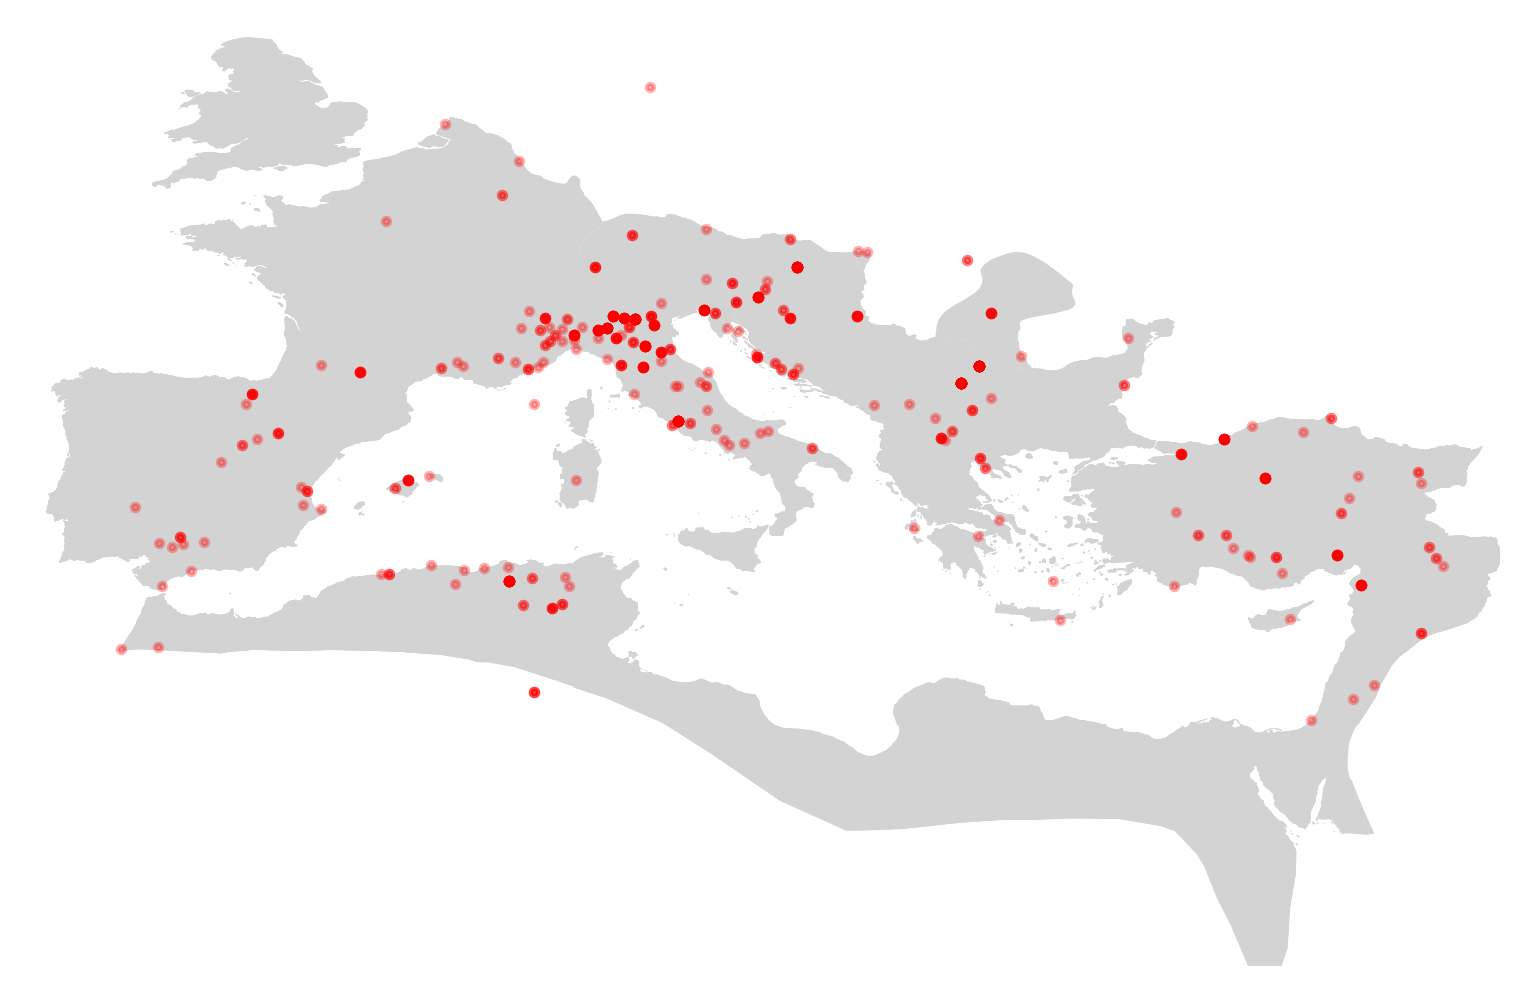

In [26]:
plt.rcParams['figure.dpi'] = 300
fig, ax = plt.subplots(figsize=[5.2, 4], tight_layout=True)

pleiades_regions.plot(color="lightgray", ax=ax)

EDHg_origo_geo.plot(alpha=0.3, color="red", markersize=3, ax=ax)

ax.set_axis_off()
ax.set_xlim(-10, 41)
ax.set_ylim(23, 55.5)

# Experiments with Levenshtein distance

In [24]:
#!pip install python-Levenshtein
import Levenshtein
Levenshtein. distance('Levenshtein Distance', 'Levensthein Distance')

2